In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

(800, 800, 1)


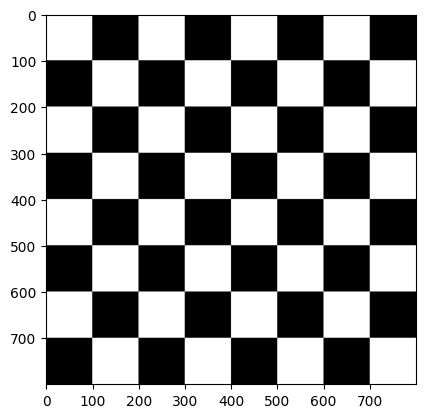

In [3]:

alto = 800
ancho = 800
color_img = np.zeros((alto,ancho,1), dtype = np.uint8)

inicio_x = 0
inicio_y = 0

for x in range(0,ancho+100,100):
    for y in range(0,alto+100,100):
        if (y%200 != 0  and x%200 !=0) or (y%200 == 0  and x%200 ==0):
            color_img[inicio_y:y,inicio_x:x,0] = 255
            continue
        inicio_y = y
    inicio_x = x

print(color_img.shape)

plt.imshow(color_img, cmap="gray") 
plt.show()

(800, 800, 3)


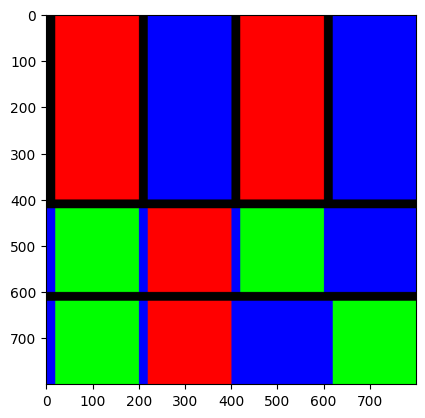

In [85]:
colors = [(255,0,0),(0,255,0),(0,0,255)]
alto = 800
ancho = 800
color_img = np.zeros((alto,ancho,3), dtype = np.uint8)

random_ancho = np.random.randint(0,ancho,1)[0]
inicio_x = 0
inicio_y = 0
gap = 20
x = 0
y = 0

for y in range(400,alto+100, 200):
    for x in range(0,ancho+100, 200):
        random_color = np.random.randint(0,3,1)[0]
        cv2.rectangle(color_img,(inicio_x,inicio_y),(x,y),colors[random_color],-1)
        inicio_x = x + gap
    inicio_y = y + gap

print(color_img.shape)

plt.imshow(color_img) 
plt.show()